**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



rmse L 0.8230482222679312
rmse Lm 1.7490301722889183
mean error L 0.2216531191322298
mean error Lm 0.6887657631112454
90% confidence interval L mean 1.27, 3.65
90% confidence interval L median 1.17, 5.36


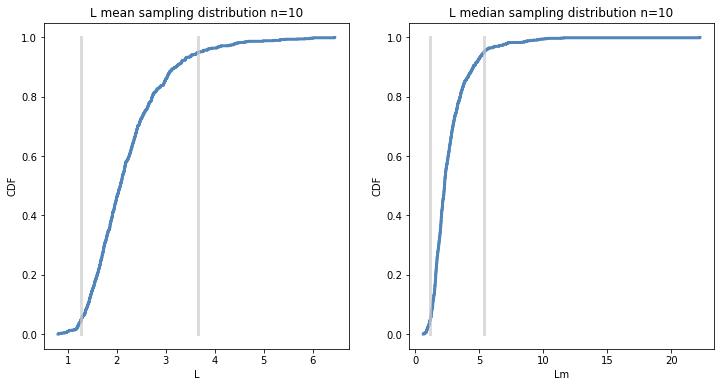

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import brfss
import thinkstats2
import thinkplot
import math

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

def Estimate3(n, m):
    lam = 2
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    cdf_mean = thinkstats2.Cdf(means)
    ci_mean = cdf_mean.Percentile(5), cdf_mean.Percentile(95)
    cdf_median = thinkstats2.Cdf(medians)
    ci_median = cdf_median.Percentile(5), cdf_median.Percentile(95)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    print('90% confidence interval L mean {:.2f}, {:.2f}'.format(ci_mean[0],ci_mean[1]))
    print('90% confidence interval L median {:.2f}, {:.2f}'.format(ci_median[0],ci_median[1]))

    thinkplot.PrePlot(2, cols=2)
    thinkplot.Cdf(cdf_mean)
    VertLine(ci_mean[0])
    VertLine(ci_mean[1])
    thinkplot.Config(xlabel='L', ylabel='CDF', title='L mean sampling distribution n=10')

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Cdf(cdf_median)
    VertLine(ci_median[0])
    VertLine(ci_median[1])
    thinkplot.Config(xlabel='Lm', ylabel='CDF', title='L median sampling distribution n=10')

Estimate3(n=10, m=1000)


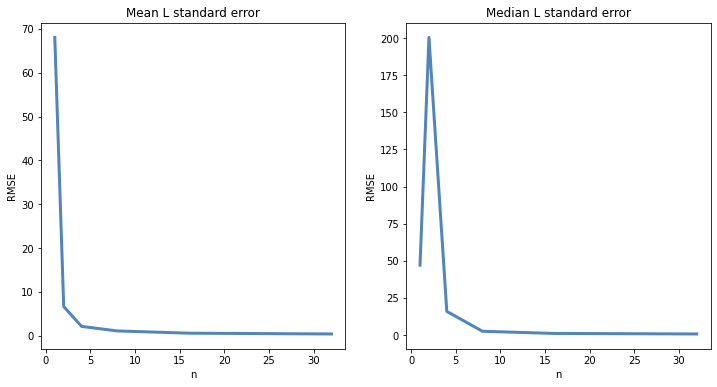

In [2]:
# compute standard error varying n
        
ns = [2**_ for _ in range(6)]
L_RMSE = []
Lm_RMSE = []

for n in ns:
    lam = 2
    means = []
    medians = []
    for _ in range(1000):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
    L_RMSE.append(RMSE(means, lam))
    Lm_RMSE.append(RMSE(medians, lam))

thinkplot.PrePlot(2, cols=2)
thinkplot.Plot(ns, L_RMSE)
thinkplot.Config(xlabel='n', ylabel='RMSE', title='Mean L standard error')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Plot(ns, Lm_RMSE)
thinkplot.Config(xlabel='n', ylabel='RMSE', title='Median L standard error')